In [31]:
pip install scipy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\Lucas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [13]:
# Carregar o arquivo CSV
file_path = 'obitos-2024.csv'
df = pd.read_csv(file_path)

In [24]:
# Estatísticas Descritivas
desc_stats = df.describe()
desc_stats

,total
count,11344.000000
mean,54.101463
std,232.571616
min,1.000000
25%,1.000000
50%,5.000000
75%,23.000000
max,6176.000000


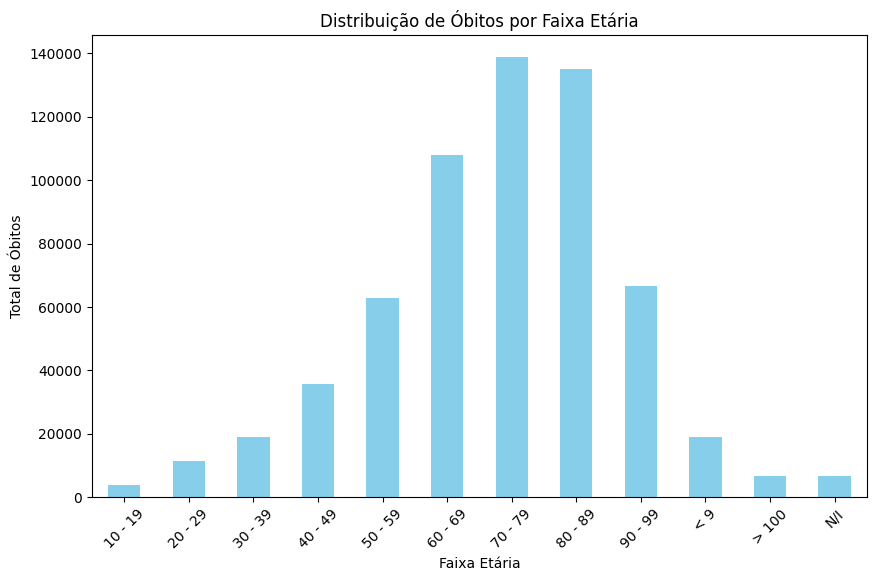

In [14]:
# Distribuição de óbitos por faixa etária
faixa_etaria_counts = df.groupby('faixa_etaria')['total'].sum()
faixa_etaria_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Distribuição de Óbitos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45)
plt.show()

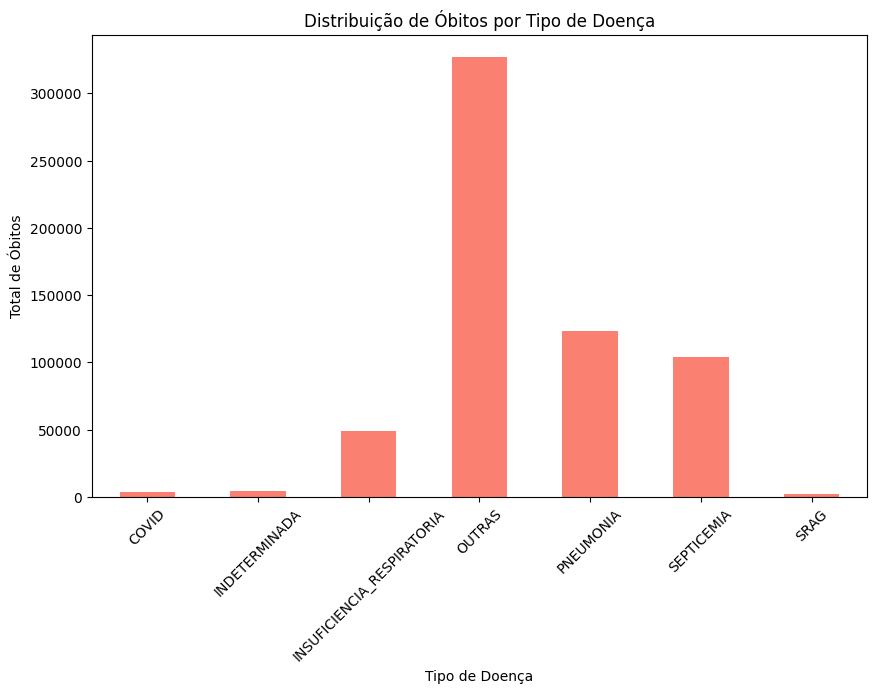

In [15]:
# Distribuição de óbitos por tipo de doença
tipo_doenca_counts = df.groupby('tipo_doenca')['total'].sum()
tipo_doenca_counts.plot(kind='bar', color='salmon', figsize=(10, 6))
plt.title('Distribuição de Óbitos por Tipo de Doença')
plt.xlabel('Tipo de Doença')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45)
plt.show()

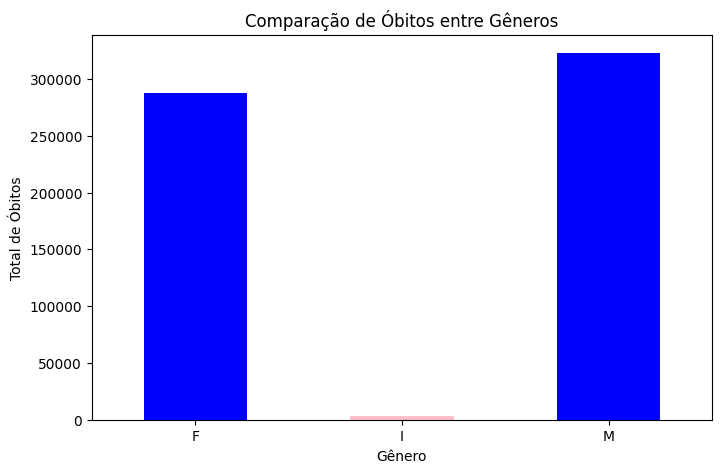

In [16]:
# Comparação de óbitos entre gêneros
genero_counts = df.groupby('sexo')['total'].sum()
genero_counts.plot(kind='bar', color=['blue', 'pink'], figsize=(8, 5))
plt.title('Comparação de Óbitos entre Gêneros')
plt.xlabel('Gênero')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=0)
plt.show()

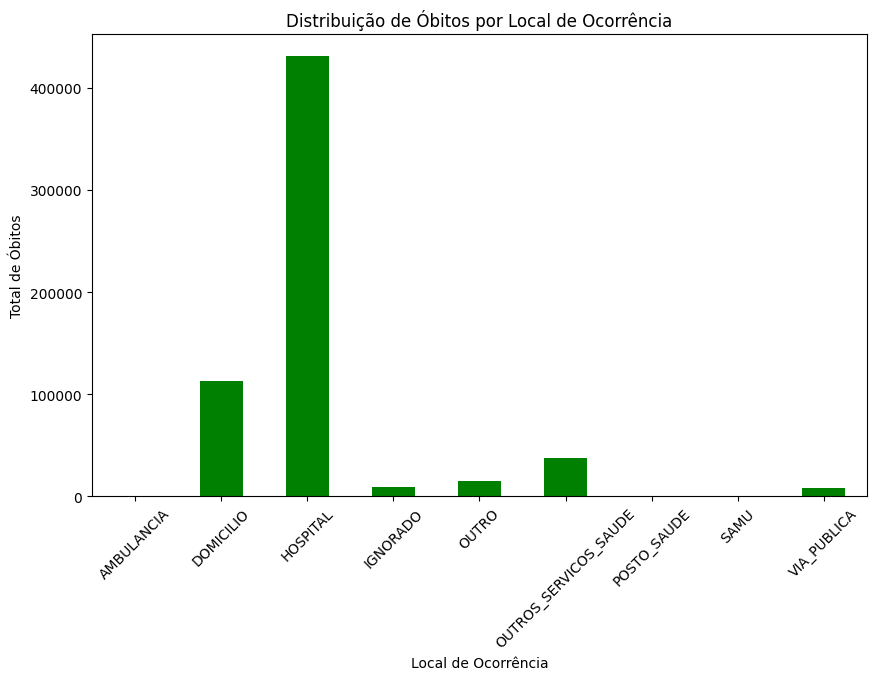

In [17]:
# Distribuição de óbitos por local de ocorrência
local_obito_counts = df.groupby('local_obito')['total'].sum()
local_obito_counts.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Distribuição de Óbitos por Local de Ocorrência')
plt.xlabel('Local de Ocorrência')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45)
plt.show()

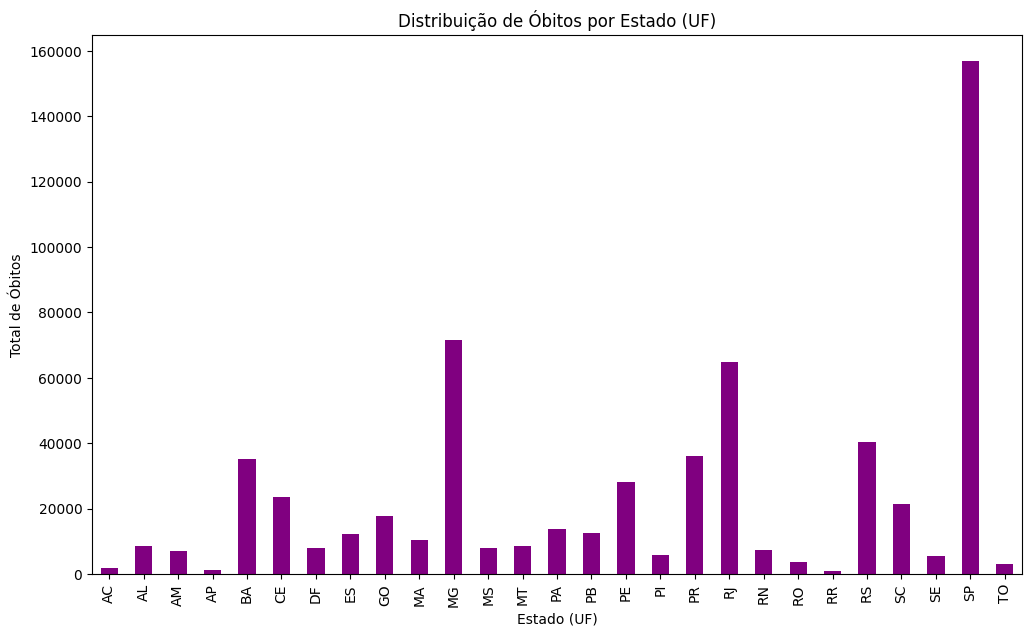

In [18]:
# Distribuição de óbitos por estado (UF)
uf_counts = df.groupby('uf')['total'].sum()
uf_counts.plot(kind='bar', color='purple', figsize=(12, 7))
plt.title('Distribuição de Óbitos por Estado (UF)')
plt.xlabel('Estado (UF)')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=90)
plt.show()

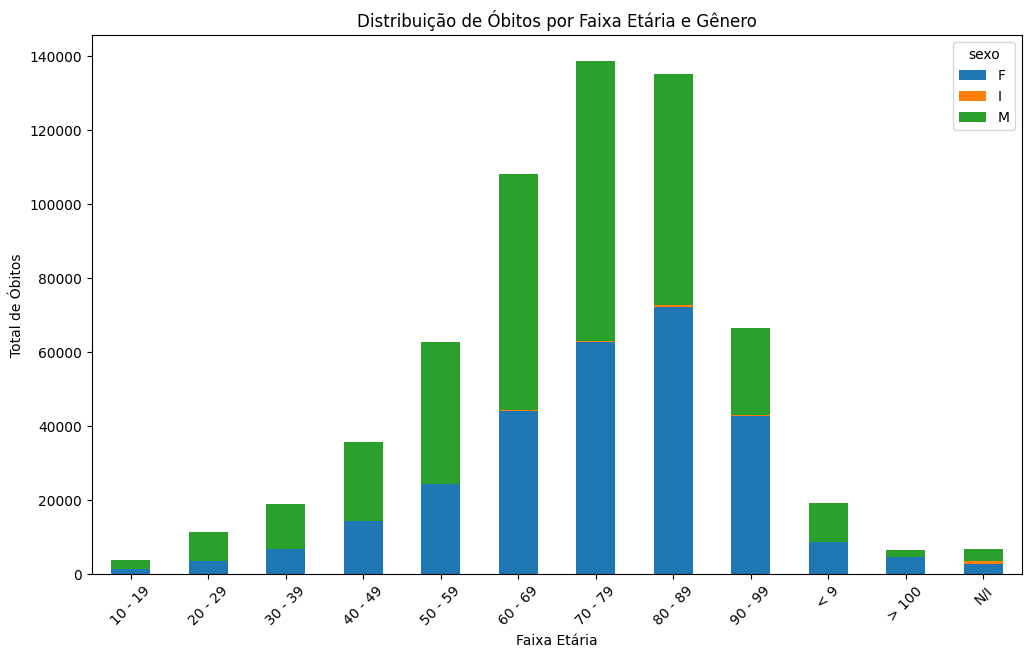

In [19]:
# Distribuição de óbitos por faixa etária e gênero
faixa_etaria_genero_counts = df.groupby(['faixa_etaria', 'sexo'])['total'].sum().unstack()
faixa_etaria_genero_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribuição de Óbitos por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45)
plt.show()

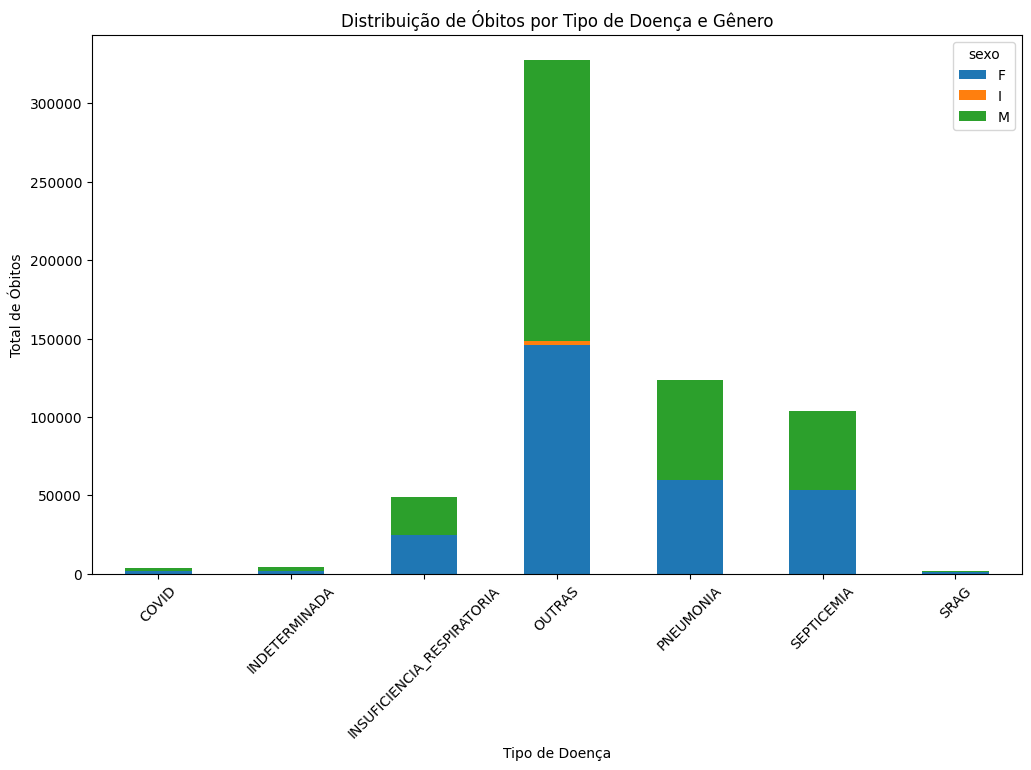

In [20]:
# Distribuição de óbitos por tipo de doença e gênero
tipo_doenca_genero_counts = df.groupby(['tipo_doenca', 'sexo'])['total'].sum().unstack()
tipo_doenca_genero_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribuição de Óbitos por Tipo de Doença e Gênero')
plt.xlabel('Tipo de Doença')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45)
plt.show()

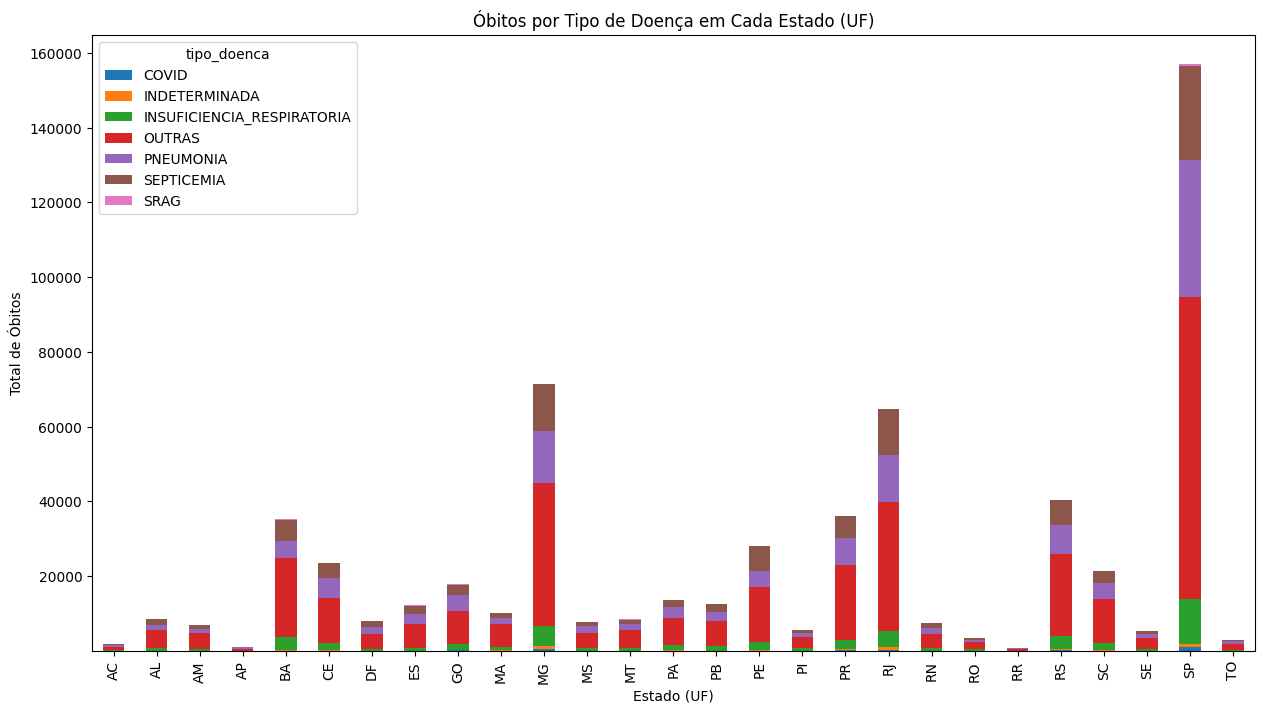

In [21]:
# Óbitos por tipo de doença em cada estado (UF)
uf_tipo_doenca_counts = df.groupby(['uf', 'tipo_doenca'])['total'].sum().unstack()
uf_tipo_doenca_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Óbitos por Tipo de Doença em Cada Estado (UF)')
plt.xlabel('Estado (UF)')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=90)
plt.show()

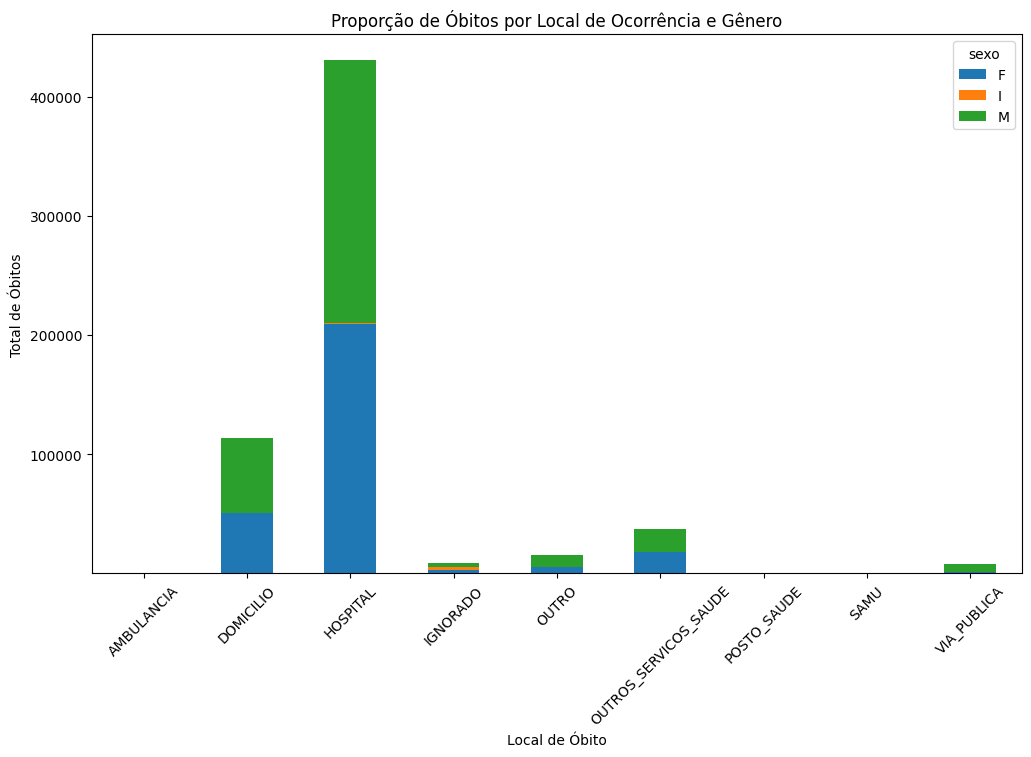

In [22]:
# Proporção de óbitos por local de ocorrência e gênero
local_obito_genero_counts = df.groupby(['local_obito', 'sexo'])['total'].sum().unstack()
local_obito_genero_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Proporção de Óbitos por Local de Ocorrência e Gênero')
plt.xlabel('Local de Óbito')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45)
plt.show()

In [33]:
# Teste de Hipótese: Óbitos entre Gêneros
genero_f = df[df['sexo'] == 'F']['total']
genero_m = df[df['sexo'] == 'M']['total']
t_stat, p_value = stats.ttest_ind(genero_f, genero_m)
print(f"Teste de Hipótese - Óbitos entre Gêneros: t_stat={t_stat}, p_value={p_value}")

Teste de Hipótese - Óbitos entre Gêneros: t_stat=-0.2704965403107294, p_value=0.7867833141294702


In [34]:
# Teste de Hipótese: Óbitos entre Locais de Óbito
domicilio = df[df['local_obito'] == 'DOMICILIO']['total']
hospital = df[df['local_obito'] == 'HOSPITAL']['total']
t_stat, p_value = stats.ttest_ind(domicilio, hospital)
print(f"Teste de Hipótese - Óbitos entre Locais de Óbito: t_stat={t_stat}, p_value={p_value}")

Teste de Hipótese - Óbitos entre Locais de Óbito: t_stat=-8.503767091033737, p_value=2.2865738748937505e-17
